In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
df=pd.read_csv('https://lukeb.co//python_csv')
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
import ast 
df['job_skills'] = df['job_skills'].apply(
    lambda skill: ast.literal_eval(skill) if isinstance(skill, str) else skill
)

c:\Users\HP\anaconda3\envs\pn_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# seaborn bulit in on matplotlib and panad bulit on numby

import seaborn as sns

In [4]:
df_DA_US= df[(df['job_title_short'] == 'Data Analyst') & (df['job_country']== 'United States')].copy()
df_DA_US=df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US=df_DA_US.explode('job_skills')

In [18]:
df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,python,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,r,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,alteryx,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,tableau,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,excel,"{'analyst_tools': ['excel', 'powerpoint']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,sql,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,vba,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,tableau,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,excel,"{'analyst_tools': ['tableau', 'excel', 'altery..."


In [ ]:


df_DA_top_pay=df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by=('median') ,ascending=False)
df_DA_top_pay=df_DA_top_pay.head(10)


df_DA_skills=df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by=('count') ,ascending=False)
df_DA_skills=df_DA_skills.head(10).sort_values(by=('median') ,ascending=False)


In [21]:
df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


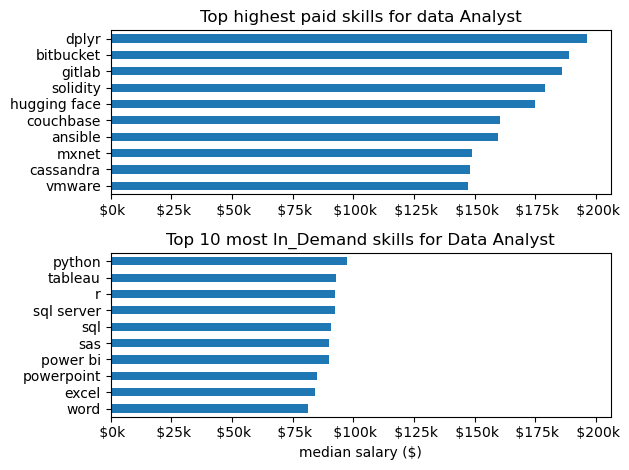

In [ ]:
fig,ax=plt.subplots(2,1)

df_DA_top_pay[::-1].plot(kind='barh',y='median',ax=ax[0])
#In a horizontal bar plot (barh), the bars always extend along the x-axis 


ax[0].set_title('Top highest paid skills for data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f' ${int(x/1000)}k'))
ax[0].legend().set_visible(False)


df_DA_skills[::-1].plot(kind='barh',y='median',ax=ax[1],legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 most In_Demand skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('median salary ($)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f' ${int(x/1000)}k'))


fig.tight_layout()

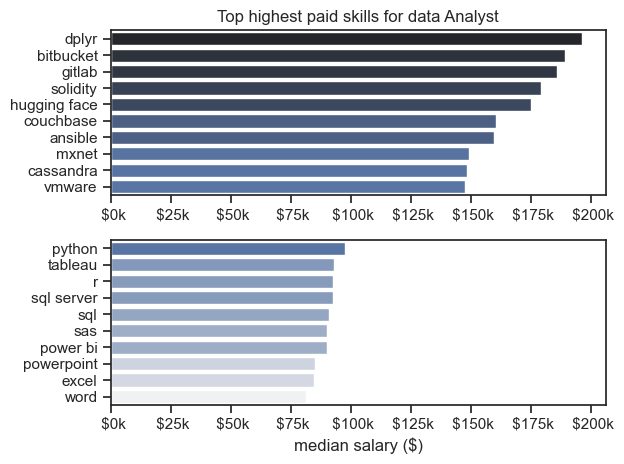

In [59]:
fig,ax= plt.subplots(2,1)

sns.set_theme(style="ticks")

#x will median and y is skills

sns.barplot(data=df_DA_top_pay, x='median',y= df_DA_top_pay.index ,ax=ax[0], hue='median',palette="dark:b_r")
#Reverse the colormap by adding "_r":
#sns.barplot() always column assigned to x is length of the bar and the column assigned to y(categories)

ax[0].set_title('Top highest paid skills for data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f' ${int(x/1000)}k'))
ax[0].legend().remove ()
# same thing ax[0].legend().set_visible(False)


sns.barplot(data=df_DA_skills,x='median',y=df_DA_skills.index,ax=ax[1],hue='median',palette="light:b")
#df_DA_skills[::-1].plot(kind='barh',y='median',ax=ax[1],legend=False)
ax[1].set_xlim(ax[0].get_xlim())
#ax[1].set_title('Top 10 most In_Demand skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('median salary ($)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f' ${int(x/1000)}k'))
ax[1].legend().remove()


fig.tight_layout()

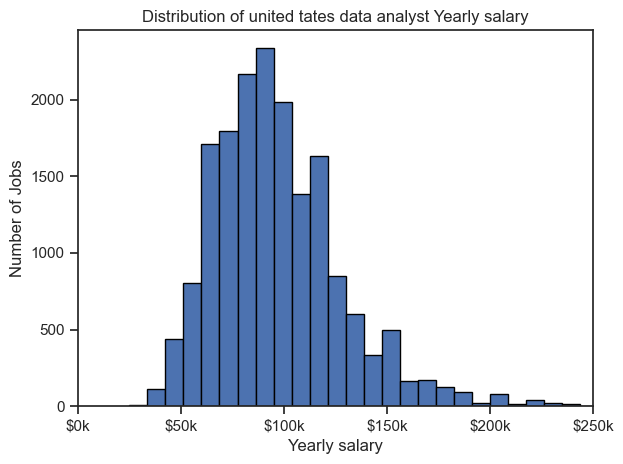

In [10]:
df_DA_US['salary_year_avg'].plot(kind='hist',bins=40,edgecolor='black')
plt.xlim(0,250000)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,pos:f'${int(x/1000)}k')) 

plt.xlabel( 'Yearly salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of united tates data analyst Yearly salary')
plt.tight_layout()
plt.show()

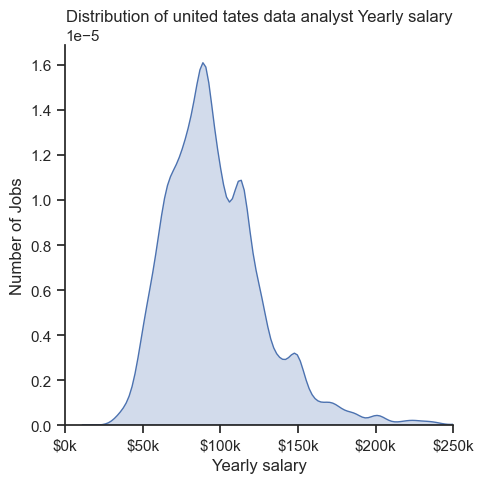

In [22]:
sns.displot(data=df_DA_US['salary_year_avg'],kind='kde',fill=True)
#we do not need x,y

plt.xlim(0,250000)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,pos:f'${int(x/1000)}k')) 

plt.xlabel( 'Yearly salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of united tates data analyst Yearly salary')
plt.tight_layout()
plt.show()

## summary

In [ ]:
"""
sns.displot() creates a distribution plot — it shows how the values of a variable are spread out,
usually as a histogram or density curve.
"""
"""
'kde' means so it is a density curve will show a smooth Kernel Density Estimate curve instead of bars
kde useful  for visualizing  continuous data(trends,peaks,spread)
"""
"""
In sns.displot(),if you pass a single Series or column (like df['salary_year_avg']),Seaborn automatically 
knows to plot that column on the x-axis and uses the density or count on the y-axis.so you do need x,y
"""


"\nIn sns.displot(),if you pass a single Series or column (like df['salary_year_avg']),Seaborn automatically \nknows to plot that column on the x-axis and uses the density or count on the y-axis.\n"

C:\Users\HP\AppData\Local\Temp\ipykernel_12352\1939622428.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list,vert=False,labels= job_titles)


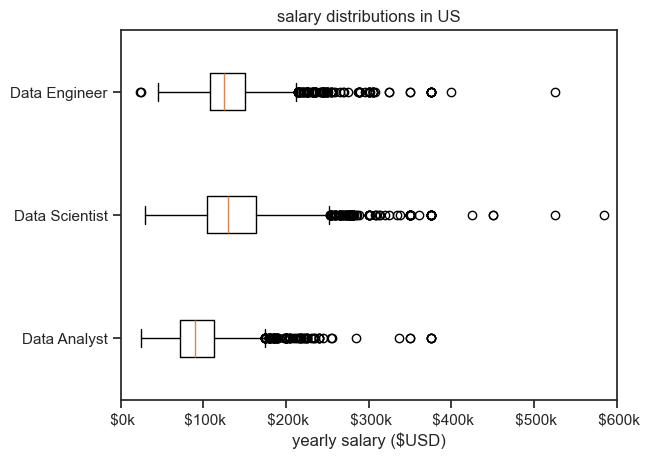

In [ ]:
job_titles=['Data Analyst', 'Data Scientist', 'Data Engineer']
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US=df_US.dropna(subset=['salary_year_avg'])

job_list=[df_US [df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles ]

plt.boxplot(job_list,vert=False,labels= job_titles)
plt.title('salary distributions in US')
plt.xlabel('yearly salary ($USD)')
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f' ${int(x/1000)}k'))
plt.xlim(0,600000)
plt.show() 

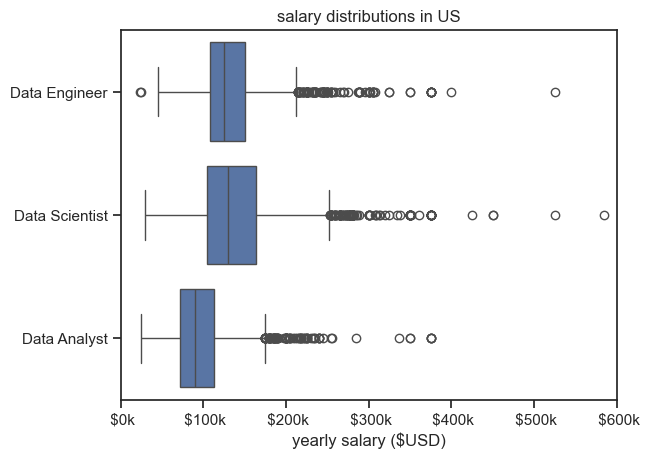

In [58]:
sns.boxplot(data=df_US,x='salary_year_avg',y='job_title_short')
plt.title('salary distributions in US')
plt.xlabel('yearly salary ($USD)')
plt.ylabel('')
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f' ${int(x/1000)}k'))
plt.xlim(0,600000)
plt.show() 

## summary

In [ ]:
# for visulization use chat gpt
# you can use tableau by Export the DataFrame to a CSV file, then import that CSV into Tableau.
""" types of sns.plot:
sns.boxplot()      → shows data distribution and outliers  
sns.barplot()      → shows average values with bars  
sns.countplot()    → shows counts of categories  
sns.violinplot()   → combines boxplot and KDE shape  
sns.stripplot()    → shows individual data points  
sns.swarmplot()    → like stripplot but non-overlapping points  
sns.histplot()     → shows histogram of values  
sns.kdeplot()      → shows smooth density curve  
sns.lineplot()     → shows trend over continuous data  
sns.scatterplot()  → shows relationship between two variables  
sns.heatmap()      → shows matrix or correlation values as colors  
sns.pairplot()     → shows pairwise relationships between columns  
sns.catplot()      → general plot for categorical data  
sns.displot()      → general distribution plot (hist, kde, etc.)
"""


In [30]:
df_US.to_csv('tableaue.csv')

## notes


In [ ]:
# df = df[df['job_title_short'] == 'Data Analyst'].copy()
# df_explode=df.explode('job_skills')
# skill_status22=df_explode.groupby('job_skills')['salary_year_avg'].count()
# skill_status=df_explode.groupby('job_skills').agg(
#     skill_count=('job_skills','count'),
#     median_salary=('salary_year_avg','median')
# )
# skill_status=skill_status.sort_values(by='skill_count',ascending=False).head(10)
# skill_status



# skill_status.plot(kind='scatter',x='skill_count',y='median_salary')
# plt.title('salary vs count of job posting for 10 Top 10 skills ') 
# plt.xlabel('count of job posting ')
# plt.ylabel('median yearly salary ($USD)')
# plt.tight_layout()
# for i,text in enumerate(skill_status.index):
#     plt.text(skill_status['skill_count'].iloc[i],skill_status['median_salary'].iloc[i],text)
#     #iloc[i] = location ,row 

# hue → specify column in order to color the data into groups based column
# palette → chooses the color scheme used for hue.

#Most common: ax.legend().set_visible(False)
#syntax:seaborn.barplot(data,x,y,hue,palette)

#sns.set_theme(style="ticks") what this code tell us?
#`set_theme() changes the overall visual style and appearance of all Seaborn plots:like background